In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
hpd=sklearn.datasets.fetch_california_housing()
hpd

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df=pd.DataFrame(hpd.data,columns=hpd.feature_names)
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


add target to the dataframe


In [ ]:
df['MedHouseVal']=hpd.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape


(20640, 9)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


FIND corelation which is important for datascience.
cbar= coloured bar,,
square= bar shape,,
fmt= correlation floating value limit,,
annot= row and column name show
cmap= map colour


<Axes: >

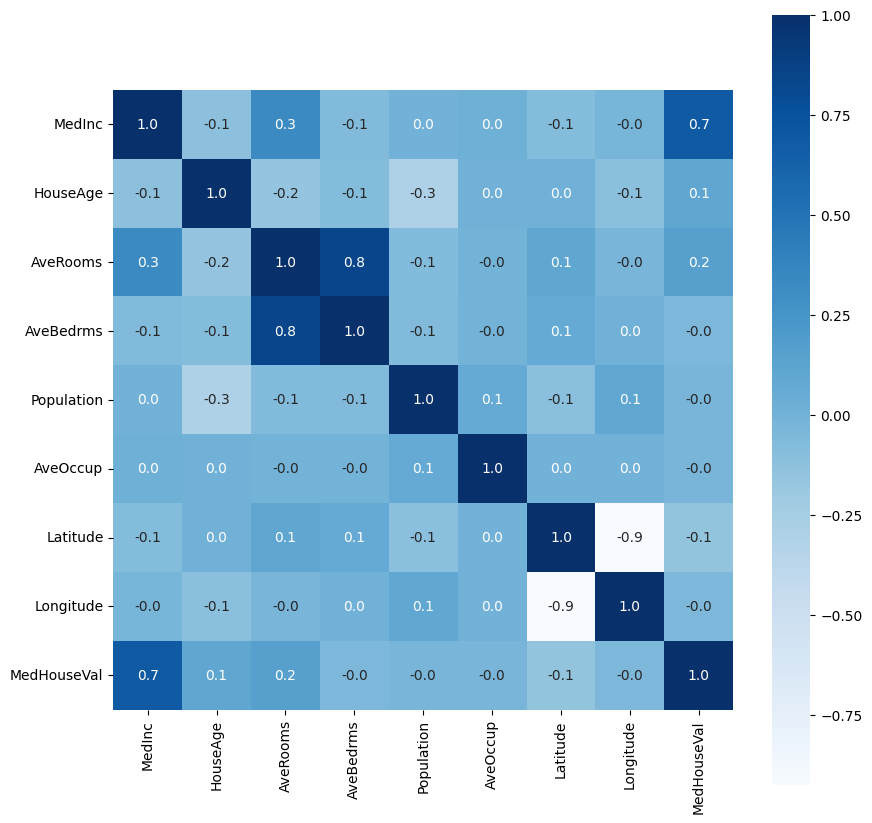

In [ ]:
correlation= df.corr()


plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [ ]:
x=df.drop(columns='MedHouseVal',axis=1)
y=df['MedHouseVal']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

only X set will be scalarized


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.transform(xtest)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,ytrain)

LinearRegression()

In [ ]:
#R squared error
score_1= metrics.r2_score(ytrain,model.predict(x_train)) # Use predict()
print('R squared error : ',score_1)

#Mean Absolute Error
score_2= metrics.mean_absolute_error(ytrain,model.predict(x_train)) # Use predict()
print('Mean Absolute Error : ',score_2)

#Mean Squared Error
score_3= metrics.mean_squared_error(ytrain,model.predict(x_train)) # Use predict()
print('Mean Squared Error : ',score_3)

R squared error :  0.6068205998456939
Mean Absolute Error :  0.5303857028686896
Mean Squared Error :  0.521993512908973


<ipython-input-13-f9423815e008>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss-ytrain)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

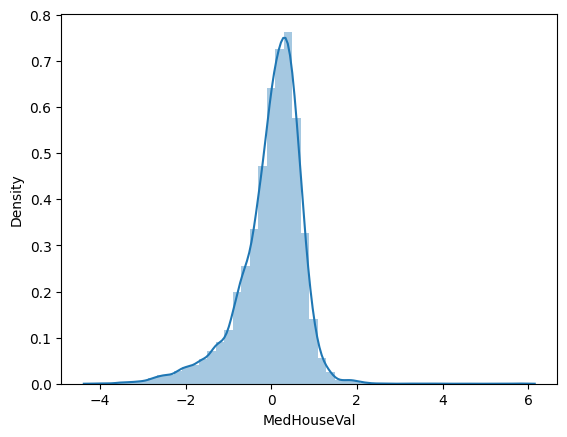

In [ ]:
ss=model.predict(x_train)
sns.distplot(ss-ytrain)

It is not classification model so we cant use accuracy score etc.
we use r2 and mean absolute error. It is less than 1 . If the model is 10 or above it, then it cant be train well


In [ ]:
#R squared error
score_1= metrics.r2_score(ytest,model.predict(x_test)) # Use predict()
print('R squared error : ',score_1)

#Mean Absolute Error
score_2= metrics.mean_absolute_error(ytest,model.predict(x_test)) # Use predict()
print('Mean Absolute Error : ',score_2)

#Mean Squared Error
score_3= metrics.mean_squared_error(ytest,model.predict(x_test)) # Use predict()
print('Mean Squared Error : ',score_3)

R squared error :  0.6013853272055154
Mean Absolute Error :  0.5358292549657772
Mean Squared Error :  0.5369436868087003


SNS PLOT

<ipython-input-15-d12f8b77ab76>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xx-ytest)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

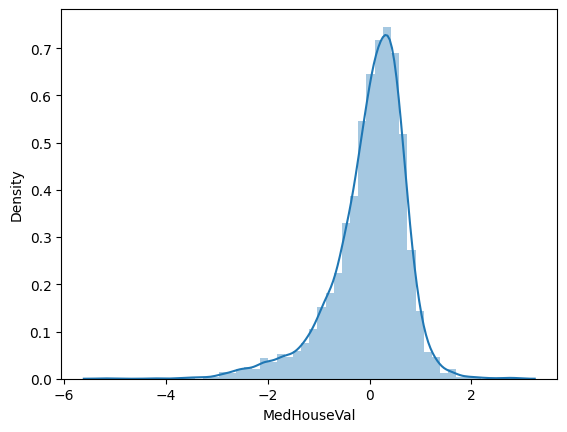

In [ ]:
xx=model.predict(x_test)
sns.distplot(xx-ytest)

<Axes: xlabel='MedHouseVal', ylabel='Density'>

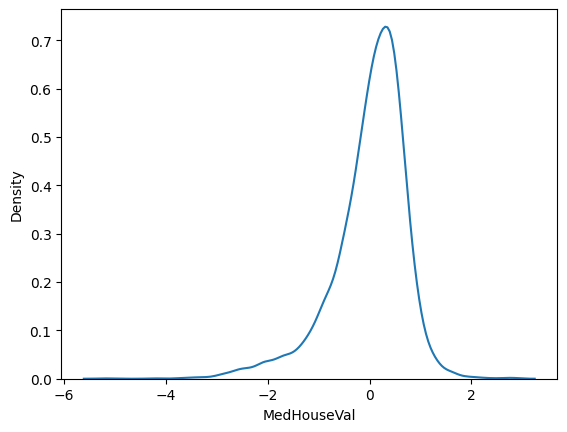

In [ ]:
xx=model.predict(x_test)
sns.kdeplot(xx-ytest)

variance is preety good .. gap is very low -2 to 2

Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr=Ridge()

In [ ]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,3]}
riderCV = GridSearchCV(rr,parameters,scoring='neg_mean_squared_error',cv=5)
riderCV.fit(x_train,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 3]},
             scoring='neg_mean_squared_error')

In [ ]:
#optioanl
print(riderCV.best_params_)
print(riderCV.best_score_)


{'alpha': 20}
-0.5284876539370409


In [ ]:
#R squared error
score_1= metrics.r2_score(ytrain,riderCV.predict(x_train)) # Use predict()
print('R squared error : ',score_1)

#Mean Absolute Error
score_2= metrics.mean_absolute_error(ytrain,riderCV.predict(x_train)) # Use predict()
print('Mean Absolute Error : ',score_2)

#Mean Squared Error
score_3= metrics.mean_squared_error(ytrain,riderCV.predict(x_train)) # Use predict()
print('Mean Squared Error : ',score_3)

R squared error :  0.6067955699461935
Mean Absolute Error :  0.5303234915439974
Mean Squared Error :  0.5220267431472887


<ipython-input-21-2872f693e2e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aa-ytrain)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

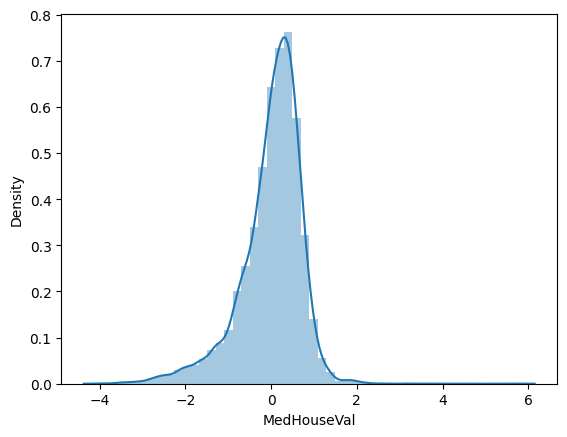

In [ ]:
aa=riderCV.predict(x_train)
sns.distplot(aa-ytrain)